# Naive Bayes Classifier for Spam Detection

## Instructions

Total Points: 10

Complete this notebook and submit it. The notebook needs to be a complete project report with 

* your implementation,
* documentation including a short discussion of how your implementation works and your design choices, and
* experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. 

Use the provided notebook cells and insert additional code and markdown cells as needed.

## Introduction

A spam detection agent gets as its percepts text messages and needs to decide if they are spam or not.
Create a [naive Bayes classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) for the 
[UCI SMS Spam Collection Data Set](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) to perform this task.

## Create a bag-of-words representation of the text messages [3 Points]

The first step is to tokenize the text. Here is an example of how to use the [natural language tool kit (nltk)](https://www.nltk.org/) to create tokens (separate words).

In [1]:
import nltk
# You need to install nltk and then download the tokenizer once.
# nltk.download('punkt')

file = open("smsspamcollection/SMSSpamCollection", "r")

sentence = file.readline()
print(f"text message: \"{sentence}\"")

tokens = nltk.word_tokenize(sentence)

print(f"tokens: {tokens}")

text message: "ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
"
tokens: ['ham', 'Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']


Experiment with removing frequent words (called [stopwords](https://en.wikipedia.org/wiki/Stop_word)) and very infrequent words so you end up with a reasonable number of words used in the classifier. Maybe you need to remove digits or all non-letter characters. You may also use a stemming algorithm. 

Convert the tokenized data into a data structure that indicates for each for document what words it contains. The data structure can be a [document-term matrix](https://en.wikipedia.org/wiki/Document-term_matrix) with 0s and 1s, a pandas dataframe or some sparse matrix structure. Make sure the data structure can be used to split the data into training and test documents (see below).

Report the 20 most frequent and the 20 least frequent words in your data set.

In [10]:
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
import io  
import random
import copy
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
import string
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')



def readfile(Trainingset, Testingset):
    total = []
    stop_words = set(stopwords.words('english'))        # Use the nltk stopwords
    stop_words.add('u')                                 # Add two more 
    stop_words.add('i')
    punct = set(string.punctuation)                         # Punctuations and numbers need to be removed 
    number = ['1','2','3','4','5','6','7','8','9','0']
    with open("smsspamcollection/SMSSpamCollection", encoding='gb18030', errors='ignore') as f:
        while True:                             
            line = f.readline()
            if not line:                                # If reaching the end of line, stop
                break
            tokens = nltk.word_tokenize(line)           # Tokenize the line 
            newline = [] 
        
            for word in tokens:                     # First removing the stop words, then stem and remove punc/numbers
                if not word in stop_words:
                    for d in word:
                        if d in punct or d in number:
                            word = word.replace(d, "")
                    newword = stemmer.stem(word)        # Use nltk snowball for stemming 
                    if not newword in stop_words and len(newword) > 0:      # remove stop words again before inserting into the list
                        newline.append(newword)   
            total.append(newline)
    
    trainingindex = random.randint(0,len(total)-1)
    trainingsize = int(len(total)*0.8)
    for i in range(trainingsize):                       # Randomly choose 80% of total lines and put them into trainingset
        Trainingset.append(total[trainingindex])
        total.pop(trainingindex)
        trainingindex = random.randint(0,len(total)-1)
    
    for line in total:
        Testingset.append(line)                     # Else go to the testingset

def analyzeDataset(Trainingset, Testingset, vis):
    wordlist = {}                           # Use a hash table to store words
    for line in Trainingset:
        for i in range(len(line)):
            if(i != 0):
                if line[i] in wordlist:
                    wordlist[line[i]] = wordlist[line[i]] + 1       # The value in the hash table is the total number of words
                else:
                    wordlist[line[i]] = 1
    

    for line in Testingset:
        for i in range(len(line)):
            if(i != 0):
                if line[i] in wordlist:
                    wordlist[line[i]] = wordlist[line[i]] + 1       # The value in the hash table is the total number of words
                else:
                    wordlist[line[i]] = 1
    
    newlist = sorted(wordlist.items(), key=lambda x: x[1], reverse=True) # Sort the hash table by keys to get the top/last words
    
    if vis is True:
        print("Printing the top 20 frequent words:")
        for i in range(20):
            print("top", i+1, "are", newlist[i])
    
        print("\nPrinting the last 20 frequent words:")
        for j in range(20):
            print("last",j+1, "are", newlist[len(newlist)-j-1])

In [11]:
training = []
testing = []

readfile(training,testing)
analyzeDataset(training,testing,True)

Printing the top 20 frequent words:
top 1 are ('call', 662)
top 2 are ('go', 459)
top 3 are ('get', 452)
top 4 are ('ur', 391)
top 5 are ('nt', 381)
top 6 are ('gt', 318)
top 7 are ('lt', 316)
top 8 are ('come', 303)
top 9 are ('ok', 285)
top 10 are ('free', 280)
top 11 are ('拢', 276)
top 12 are ('know', 275)
top 13 are ('day', 263)
top 14 are ('love', 259)
top 15 are ('like', 259)
top 16 are ('got', 253)
top 17 are ('time', 249)
top 18 are ('want', 246)
top 19 are ('good', 244)
top 20 are ('text', 226)

Printing the last 20 frequent words:
last 1 are ('salesman', 1)
last 2 are ('nmde', 1)
last 3 are ('dental', 1)
last 4 are ('accent', 1)
last 5 are ('spiritu', 1)
last 6 are ('wcn', 1)
last 7 are ('gsex', 1)
last 8 are ('compliment', 1)
last 9 are ('planettalkinstantcom', 1)
last 10 are ('ofcours', 1)
last 11 are ('gyno', 1)
last 12 are ('boob', 1)
last 13 are ('chick', 1)
last 14 are ('cop', 1)
last 15 are ('stolen', 1)
last 16 are ('toilet', 1)
last 17 are ('efreefon', 1)
last 18 are

### Word parsing analysis

* 1: The stopwords and stemming method I used are in the nltk package.
* 2: The punctuation I used are in the string library.
* 3: For each word the program parsed, it firstly checks whether it is a stop word, then it will remove numbers and punctuations. After removing those items, the program will stem the word. Finally, it will check stopword again before inserting into the list.
* 4: From the total line list, the program will randomly choice 80% number of lines and put them into the training set, and rest are into the testing set. 
* 5: The words are stored in a hash table so that it can be accessed with O(1). The keys in the table are words, and the values are the total numbers they appear.The hable will also be sorted so that we can know top 20 and last 20 words.
* 6: The top 11st word is not 拢, but it is £ in my local machine with VS Code. I'm not sure why it shows like that in the Jupyter Notebook.

#### Note: Since I remove stop words twice and do stemming after removeing numbers and punctuations, the result may be slightly different than others.


## Learn parameters [3 Points]

Use 80% of the data (called training set; randomly chosen) to learn the parameters of the naive Bayes classifier (prior probabilities and likelihoods). Use [Laplacian smoothing](https://en.wikipedia.org/wiki/Additive_smoothing) for the counts.

Report the top 20 words (highest conditional probability) for spam and for ham (i.e., not spam).

In [14]:
def analyzeTraining(Trainingset, prior, dataset, vis): # The keys in the dataset are words, values are a list [P(word|spam), P(word|ham)]
    wordlist = {}                   # A training wordlist keys are words, values are a list of spam or ham it has (so that we can know
    nspam = 0                       # the number of spam/ham emails it appears)
    nham = 0
    
    for currentline in Trainingset:
        currentstatus = currentline[0]              # Record whether it's ham or spam
        
        for j in range(len(currentline)):
            if(j != 0):       
                if currentline[j] in wordlist:
                    wordlist[currentline[j]].append(currentstatus)
                else:
                    wordlist[currentline[j]] = []
                    wordlist[currentline[j]].append(currentstatus)
                    
        if (currentstatus == "spam"):
            nspam = nspam + 1
        else:
            nham = nham + 1

    spamwordlist = {}       # A word list with P(word|spam) only
    hamwordlist = {}        # A word list with P(word|ham) only

    for word in wordlist.keys():            # Analyze the probability based on the Bayes model
        resultlist = wordlist[word]
        cnspam = 0
        cnham = 0
        
        for result in resultlist:
            if(result == "spam"):
                cnspam = cnspam + 1
            else:
                cnham = cnham + 1

        pnspam = (cnspam + 1) / (nspam + 2)         # The Bayes model with Laplacian smoothing 
        pnham = (cnham + 1) / (nham + 2)

        if vis is True:
            spamwordlist[word] = pnspam
            hamwordlist[word] = pnham
        dataset[word] = [pnspam, pnham]         # Insert those conditional probability into tables
      
    prior.append(nspam / len(Trainingset))  # prior is a list with [P(spam), P(ham)]
    prior.append(nham / len(Trainingset))
    
    if vis is True:
        newspamlist = sorted(spamwordlist.items(), key=lambda x: x[1], reverse=True)
        newhamlist = sorted(hamwordlist.items(), key=lambda x: x[1], reverse=True)

        print("Printing the 20 words with the greatest conditional probability of spam:")
        for i in range(20):
            print("top", i+1, "are", newspamlist[i])
    
        print("\nPrinting the 20 words with the greatest conditional probability of ham:")
        for j in range(20):
            print("top",j+1, "are", newhamlist[j])

In [15]:
training = []
testing = []
prior = []
dataset = {}


readfile(training,testing)
analyzeTraining(training, prior, dataset, True)

Printing the 20 words with the greatest conditional probability of spam:
top 1 are ('call', 0.4873096446700508)
top 2 are ('拢', 0.3604060913705584)
top 3 are ('free', 0.3062605752961083)
top 4 are ('txt', 0.21996615905245348)
top 5 are ('ur', 0.1996615905245347)
top 6 are ('text', 0.19458544839255498)
top 7 are ('mobil', 0.17597292724196278)
top 8 are ('stop', 0.1692047377326565)
top 9 are ('repli', 0.15736040609137056)
top 10 are ('claim', 0.15228426395939088)
top 11 are ('get', 0.13028764805414553)
top 12 are ('week', 0.12859560067681894)
top 13 are ('prize', 0.1218274111675127)
top 14 are ('p', 0.10829103214890017)
top 15 are ('tone', 0.10490693739424704)
top 16 are ('send', 0.09983079526226735)
top 17 are ('new', 0.09983079526226735)
top 18 are ('nokia', 0.09813874788494077)
top 19 are ('servic', 0.09306260575296109)
top 20 are ('urgent', 0.09137055837563451)

Printing the 20 words with the greatest conditional probability of ham:
top 1 are ('go', 0.08832644628099173)
top 2 are ('g

### Spam training analysis

* 1: The dataset passed in is a hash table which the keys are words, values are a list like [P(word|spam), P(word|ham)]
* 2: It also uses three more hash tables. A wordlist has keys that are words, and its values are a list of spam or ham.spamwordlist and hamwordlist are two tables that have keys with words and values with P(word|spam)or P(word|ham), so that we can know the highest probability by sorting those two tables.
* 3:The Bayes model equation with Laplacian smoothing I used is 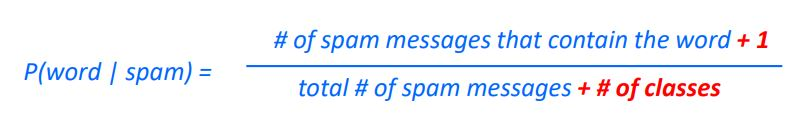


## Evaluate the classification performance [4 Points] 

Classify the remaining 20% of the data (test set) and calculate classification accuracy. Accuracy is defined as the proportion of correctly classified test documents.

Inspect a few misclassified text messages and discuss why the classification failed.

Discuss how you deal with words in the test data that you have not seen in the training data.

In [16]:
def analyzeTesting(Testingset, prior, dataset, vis):
    correctsize = 0
    
    for currentline in Testingset:
    
        currentps = prior[0]
        currentph = prior[1]
        answer = currentline[0]
            
        for j in range(1,len(currentline)):
            currenword = currentline[j]
            if currenword in dataset:
                currentps = currentps * dataset[currenword][0]           # Use equation to find the probability of [spam|message]
                currentph = currentph * dataset[currenword][1]      # Use equation to find the probability of [ham|message]
        
        
        if(currentps > currentph and answer == "spam"):                 # Check whether it is correct
            correctsize = correctsize + 1
            
        elif(currentps <= currentph and answer == "ham"):
            correctsize = correctsize + 1
        else:
            if(vis == True and answer == "ham"):
                print(currentline,"Should be", answer, "actually got spam")
            elif(vis == True and answer == "spam"):
                print(currentline,"Should be", answer, "actually got ham")
    return correctsize/len(Testingset) * 100   

In [18]:
training = []
testing = []
prior = []
dataset = {}


readfile(training,testing)
analyzeTraining(training, prior, dataset, False)
print("\nAccuracy is", format(analyzeTesting(testing, prior, dataset, True), '.4f'), "%")

['ham', 'date', 'sunday'] Should be ham actually got spam
['spam', 'hear', 'new', 'divorc', 'barbi', 'come', 'ken', 'stuff'] Should be spam actually got ham
['ham', 'wait', 'machan', 'call', 'free'] Should be ham actually got spam
['ham', 'yes', 'start', 'send', 'request', 'make', 'pain', 'came', 'back', 'back', 'bed', 'doubl', 'coin', 'factori', 'got', 'ta', 'cash', 'nitro'] Should be ham actually got spam
['ham', 'would', 'ip', 'address', 'test', 'consid', 'comput', 'nt', 'minecraft', 'server'] Should be ham actually got spam
['ham', 'dear', 'call', 'tmorrowpl', 'accomod'] Should be ham actually got spam
['ham', 'yes', 'see', 'ya', 'dot'] Should be ham actually got spam
['ham', 'ummmawil', 'call', 'check', 'inour', 'life', 'begin', 'qatar', 'pls', 'pray', 'hard'] Should be ham actually got spam
['ham', 'bruv', 'hope', 'great', 'break', 'reward', 'semest'] Should be ham actually got spam
['ham', 'today', 'accept', 'day', 'accept', 'brother', 'sister', 'lover', 'dear', 'best', 'clos', 

### Spam classifying analysis

* 1: The classifying equations I used are 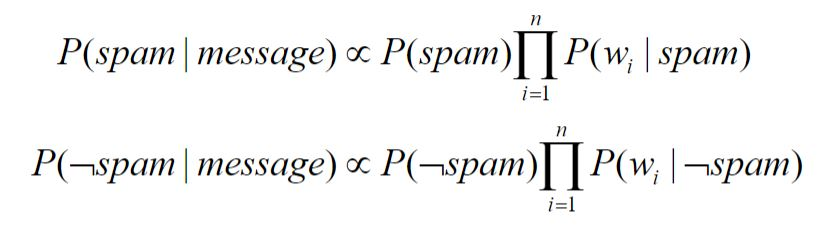
* 2: After I got P(spam|message) and P(ham|message), I'll compare them to identify whether it's a spam or a ham.
* 3: I set the original probability as P(spam) and P(ham). Therefore, if there is a word that is not in the dataset, it will not analyze it but just move to the next one. If all the words in the line are not in the list, the identification will be made by P(spam) and P(ham).
* 4: There are some mis-classifying results showing in the result, and it appears that most of them have uncommon words or neutral words which are hard to be identified.

## Bonus task [+1 Point]

Describe how you could improve the classifier.

There are various way to improve the classifer:
* 1: Use larger dataset for training will have more accurate probabilities for each word.
* 2: Add some constant c to improve the equation, it purely depends on the size of spam emails and ham emails.Below is an implementation.

In [19]:
def analyzeTesting_improve1(Testingset, prior, dataset, c, vis):
    correctsize = 0
    
    for currentline in Testingset:
    
        currentps = prior[0]
        currentph = prior[1]
        answer = currentline[0]
            
        for j in range(1,len(currentline)):
            currenword = currentline[j]
            if currenword in dataset:
                currentps = currentps * dataset[currenword][0]           # Use equation to find the probability of [spam|message]
                currentph = c * currentph * dataset[currenword][1]      # Here is the c
        
        
        if(currentps > currentph and answer == "spam"):                 # Check whether it is correct
            correctsize = correctsize + 1
            
        elif(currentps <= currentph and answer == "ham"):
            correctsize = correctsize + 1
        else:
            if(vis == True and answer == "ham"):
                print(currentline,"Should be", answer, "actually got spam")
            elif(vis == True and answer == "spam"):
                print(currentline,"Should be", answer, "actually got ham")
    return correctsize/len(Testingset) * 100              
    

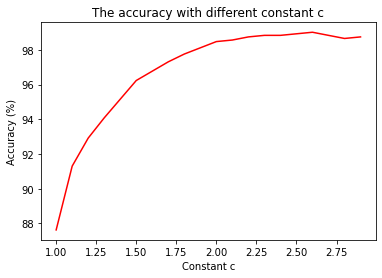

In [20]:
import matplotlib.pyplot as plt
from matplotlib import colors

training = []
testing = []
prior = []
dataset = {}

readfile(training,testing)
analyzeTraining(training, prior, dataset, False)

x_axis = []
y_axis = []
for i in range(10,30):
    x_axis.append(i/10)
    y_axis.append(analyzeTesting_improve1(testing, prior, dataset, i/10, False))
    

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_axis, y_axis, 'r-')
plt.title("The accuracy with different constant c")
plt.xlabel("Constant c")
plt.ylabel("Accuracy (%)")
plt.show()

### Constant c's improvement
* 1: For the equations in the classifying, sicne it's direct proportionality not equality, I'm thinking add a c to modify the calculation.
* 2: I use a c from 1.0 to 3.0 (1.0,1.1,....3.0), and it shows that the accuracy can be improved from 88% up to 98-99%, which is a huge gap.
* 3: Thinking about why, I think that's because there'are more ham emails than spam emails, and the classifying result shows that there are many ham emails are wrongly identified as spam emails. Therefore, if we add more weights on P(ham|message) or P(word|ham), it will improve the algorithm.
* 4: Such a improvement is highly depends on the dataset, if there are much more spam emails than ham emails, we should add more weight on the other equation.